# This file is used for exploring the ground truth data 


In [1]:
import os
import yaml
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from label_loader import LabelLoader
import torch


In [2]:
def load_yaml_file(file_path):
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)
    return data

In [3]:

cfg_dir = "/home/aneesh/sandbox/multi-modal/mangos/eda/config"
cfg_f   = "labels.yaml"
cfg_filepath = os.path.join(cfg_dir, cfg_f)

cfg = load_yaml_file(cfg_filepath)


In [4]:
cfg

{'labels': {'path': '/home/aneesh/sandbox/multi-modal/mangos/dataset/SP2024/Data - Mango/Reference data',
  'data_f': '20231218 Brix-Dry matter-Firmness Vertigo-II.xlx',
  'sheet_name': 'Brix-DM-firmness',
  'label': 'Max. force (kg)',
  'id': 'Fruit'}}

In [5]:
l_cfg = cfg['labels']

l_cfg

{'path': '/home/aneesh/sandbox/multi-modal/mangos/dataset/SP2024/Data - Mango/Reference data',
 'data_f': '20231218 Brix-Dry matter-Firmness Vertigo-II.xlx',
 'sheet_name': 'Brix-DM-firmness',
 'label': 'Max. force (kg)',
 'id': 'Fruit'}

In [6]:
loader = LabelLoader(l_cfg)
loader.load()

In [7]:
df = loader._data_df
label_name = loader._label_name
id_name = loader._id_name 

In [8]:
df[label_name]

Fruit
1      11.095
2       7.161
3       9.494
4      10.868
5       8.558
        ...  
486     1.222
487     1.192
488     0.882
489     1.380
490     1.456
Name: Max. force (kg), Length: 488, dtype: float64

In [15]:
loader[490]

tensor([1.4560])

# Clean the data, remove items where no value is there

In [10]:
#clean data
df[label_name] = pd.to_numeric(df[label_name], errors='coerce')

# Filter out rows where 'label_name' is NaN and keep rows with valid floats in 'B')
filtered_df = df.dropna(subset=[label_name])

In [11]:
print(len(df), len(filtered_df))

filtered_df

488 488


Fruit       Provider      CV      Box  Brix (°)     DM (%)  \
Fruit                                                               
1          1  Special fruit    Kent      1-6      13.1  17.016414   
2          2  Special fruit    Kent      1-6      13.5  15.753425   
3          3  Special fruit    Kent      1-6      12.8  15.446961   
4          4  Special fruit    Kent      1-6      13.7  16.744383   
5          5  Special fruit    Kent      1-6      13.7  16.637478   
...      ...            ...     ...      ...       ...        ...   
486      486  Special fruit  Palmer  483-490      15.4  16.725912   
487      487  Special fruit  Palmer  483-490      15.6  17.162330   
488      488  Special fruit  Palmer  483-490      13.5  13.392342   
489      489  Special fruit  Palmer  483-490      15.5  18.433019   
490      490  Special fruit  Palmer  483-490      15.6  13.977868   

       Max. force (kg)  Slope (kg/mm)  Distance at Max. force (mm)  Size  \
Fruit                                                                      
1               11.095       1.069485                         7.54   6.0   
2                7.161       0.799980                         7.73   6.0   
3                9.494       1.180671                         7.87   6.0   
4               10.868       1.074969                         7.87   6.0   
5                8.558       1.043656                         7.41   6.0   
...                ...            ...                          ...   ...   
486              1.222       0.394532                         4.19   8.0   
487              1.192       0.304628                         4.39   8.0   
488              0.882       0.305292                         3.01   8.0   
489              1.380       0.424157                         3.71   8.0   
490              1.456       0.423526                         4.10   8.0   

      Remark  
Fruit         
1        NaN  
2        NaN  
3        NaN  
4        NaN  
5        NaN  
...      ...  
486      NaN  
487      NaN  
488      NaN  
489      NaN  
490      NaN  

[488 rows x 11 columns]

Could not retreive the label for id 0. 0
Could not retreive the label for id 288. 288
Could not retreive the label for id 404. 404


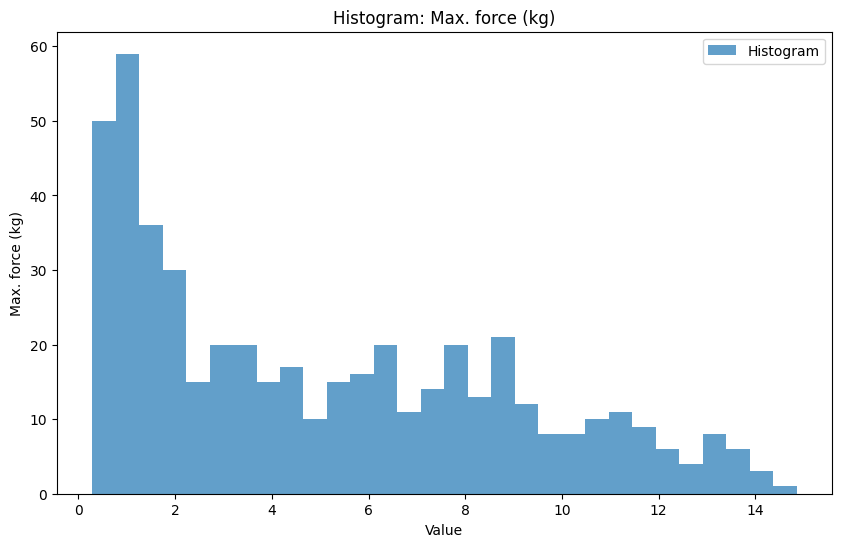

In [12]:
labels_tensors = [l for l in loader if l is not None] #Because for some fruits there are no labels

labels = torch.tensor([t.item() for t in labels_tensors])


plt.figure(figsize=(10, 6))
plt.hist(labels, bins=30, alpha=0.7, label='Histogram')

plt.xlabel('Value')
plt.ylabel(label_name)
plt.title('Histogram: '+label_name)
plt.legend()
plt.show()

# Let's create a balanced set for another day (some tests here)

In [13]:
y = labels
print(len(y), min(y), max(y))

488 tensor(0.2850) tensor(14.8530)


In [14]:
from sklearn.model_selection import StratifiedKFold
import numpy as np


# Discretize the target variable into bins
num_bins = np.ceil(1 + np.log2(len(y)))  # Sturges' rule for bin count
print(num_bins)
y_binned = np.digitize(y, bins=np.linspace(min(y), max(y)-2, num=int(num_bins)))
print(y_binned)

skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(y_binned, y_binned):
    y_train, y_test = y[train_index], y[test_index]
    print("y_test: ",y_test)
    # Proceed with training and validation


10.0
[ 8  5  7  8  6  7  2  3  3  7  2  4  6  6  7  8  6  6  9 10 10  8 10  9
  7  4  6  5  9  5  6  5  5  5  7  6  3  1  2  1  1  1  2  1  2  1  1  2
 10 10 10  8  9  8  3  8  6  4  6  6  7  8  9  9 10  9  9  8  9  8  8 10
  1  1  1  1  1  2  6  6  6  4  6  7  3  2  2  3  2  8  4  8  7  8  6  5
  5  5  4  2  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  3  6  2  3  4  2  3  5  2  2  2  2  4  1  3  3  7  2  3  3  5  2
  1  5  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  1
  3  1  2  1  1  1  1  2  1  2  3  1  1  2  1  6  6  7  6  8  7  4  9  9
 10  6  7  9  6  9  8  6 10  4  3  3  5  4  4  4  7  4  3  3  3  2  2  2
  2  1  2  3  2  9  6  7  5  7  6  7  8  6  9 10  8  8 10 10  8  8 10  7
  7  5  8 10  5  7  9 10  7  7  8  6  8  6  9  3  3  4  4  5  3  3  5  3
  4  5  4  1  3  5  4  4  4  5  4  7  3  4  1  5  1  3  4  1  3  5  4  5
  5  2  1  6  1  5  2  3  4  3  3  4  1  3  1  2  2  2  2  5  5  3  3  5
  5  2  2  2  5  5  1  1  1  1  1  1  1  1  1 